Mapping of PFAS-affected populations

受PFAS影响人口图的绘制

In [26]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import myfunction as mf
path_data_raw = "C:/Users/dell/OneDrive/file/"
path_country_nc = "C:/Users/dell/OneDrive/file/nc"
path_country_csv = "C:/Users/dell/OneDrive/file/csv/"
path_one_spdb = 'C:/Users/dell/OneDrive/file/SPDB/'
drive_letter = 'E:'

path_pre = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part0_treat/pretreatment/"
path_match = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part0_treat/match/"
path_semdata = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part0_treat/semdata/"

path_2_preanalysis_data = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part2_sem/preanalysis/"
path_2_preanalysis_fig = drive_letter + "/wyy/code_project/running_outcome/final_fig/SPDB/part2_sem/preanalysis/"

path_3_sw_forecast = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/part3_forecast/sw_forecast/"
path_temp = drive_letter + "/wyy/code_project/running_outcome/final_data/SPDB/temp/"

path_1_describe_fig_fish = drive_letter + "/wyy/code_project/running_outcome/final_fig/SPDB/part1_describe/fish_diff/"
path_1_describe_global_map = drive_letter + "/wyy/code_project/running_outcome/final_fig/SPDB/part1_describe/global_map/"

path_ng_fig = drive_letter + "/wyy/code_project/running_outcome/final_fig/ng_fig/"

mark_num = "25"
meta_name = "meta_data.csv"

list_pfas =['PFOA', 'PFNA', 'PFDA', 'PFUnDA','PFDoDA','PFTrDA', 'PFTeDA', 'PFHxS', 'PFOS', 'FOSA', 'PFBA', 'PFPeA', 'PFHxA', 'PFHpA','PFBS']
list_pfas_lc = ['PFOA', 'PFNA', 'PFDA', 'PFUnDA','PFDoDA','PFTrDA', 'PFTeDA', 'PFHxS', 'PFOS', 'FOSA']
list_pfas_sc = ['PFBA', 'PFPeA', 'PFHxA', 'PFHpA','PFBS']
list_color = ["#4d8cbf", "#4f9c8b", "#555c6c", "#d77563", "#7d84a8", "#84aeb8", "#c3473b", "#89756d","#ffb3cc","#9a7ebf","#ffddb8", "#c4eaff", "#d1c6ff", "#c2ffbf", "#f5f5b0"]


dic_color = dict(zip(list_pfas,list_color))

In [35]:
import pandas as pd
# Processing data
# 处理数据
def get_thq_nc_data(file_path, output_path, str_colname):
    df = pd.read_csv(file_path)
    df = df[['lon', 'lat', 'year', str_colname]]
    df = df[(df['year'] >= 2000) & (df['year'] <= 2020)]
    pivot_df = df.pivot_table(index=['lon', 'lat'], columns='year', values=str_colname)
    pivot_df.reset_index(inplace=True)
    pivot_df.columns.name = None
    years = list(map(int, range(2000, 2020 + 1)))
    if 'thq' in str_colname:
        pivot_df['potentially'] = pivot_df[years].apply(lambda row: (row >= 1).sum() / 21 if (row >= 1).sum() > 0 else 0, axis=1)
        pivot_df['sum'] = pivot_df[years].apply(lambda row: (row >= 1).sum(), axis=1)
        pivot_df['avgthq'] = pivot_df[years].mean(axis=1)
    elif 'pop' in str_colname:
        pivot_df['avgpop'] = pivot_df[years].mean(axis=1)
    pivot_df.to_csv(output_path, index=False)
    print("Data save to:", output_path)
    return 'okk'

In [37]:
file_path = r'E:\wyy\code_project\running_outcome\final_data\SPDB\part4_assess\thq\merge_thq_statistics.csv'
output_path = r'E:\wyy\code_project\running_outcome\final_data\SPDB\part4_assess\nc\thq_fig_data.csv'

file_path1 = r'E:\wyy\code_project\running_outcome\final_data\SPDB\part4_assess\thq\sw_thq_statistics.csv'
output_path1 = r'E:\wyy\code_project\running_outcome\final_data\SPDB\part4_assess\nc\sw_thq_fig_data.csv'

file_path2 = r'E:\wyy\code_project\running_outcome\final_data\SPDB\part4_assess\thq\lr_thq_statistics.csv'
output_path2 = r'E:\wyy\code_project\running_outcome\final_data\SPDB\part4_assess\nc\lr_thq_fig_data.csv'

get_thq_nc_data(file_path, output_path, 'thq__50%')
get_thq_nc_data(file_path1, output_path1, 'thq_water_50%')
get_thq_nc_data(file_path2, output_path2, 'thq_fish_50%')

数据已成功转换并保存到: E:\wyy\code_project\running_outcome\final_data\SPDB\part4_assess\nc\thq_fig_data.csv
数据已成功转换并保存到: E:\wyy\code_project\running_outcome\final_data\SPDB\part4_assess\nc\sw_thq_fig_data.csv
数据已成功转换并保存到: E:\wyy\code_project\running_outcome\final_data\SPDB\part4_assess\nc\lr_thq_fig_data.csv


'okk'

In [31]:
file_path3 = r'E:\wyy\code_project\running_outcome\final_data\SPDB\part4_assess\thq\combined_pop_statistics.csv'
output_path3 = r'E:\wyy\code_project\running_outcome\final_data\SPDB\part4_assess\nc\pop_fig_data.csv'

file_path4 = r'E:\wyy\code_project\running_outcome\final_data\SPDB\part4_assess\thq\sw_pop_statistics.csv'
output_path4 = r'E:\wyy\code_project\running_outcome\final_data\SPDB\part4_assess\nc\sw_pop_fig_data.csv'

file_path5 = r'E:\wyy\code_project\running_outcome\final_data\SPDB\part4_assess\thq\lr_pop_statistics_d.csv'
output_path5 = r'E:\wyy\code_project\running_outcome\final_data\SPDB\part4_assess\nc\lr_pop_fig_data.csv'

get_thq_nc_data(file_path3, output_path3, 'imp_pop_50%')
get_thq_nc_data(file_path4, output_path4, 'imp_pop_50%')
get_thq_nc_data(file_path5, output_path5, 'imp_pop_50%')

数据已成功转换并保存到: E:\wyy\code_project\running_outcome\final_data\SPDB\part4_assess\nc\pop_fig_data.csv
数据已成功转换并保存到: E:\wyy\code_project\running_outcome\final_data\SPDB\part4_assess\nc\sw_pop_fig_data.csv
数据已成功转换并保存到: E:\wyy\code_project\running_outcome\final_data\SPDB\part4_assess\nc\lr_pop_fig_data.csv


'okk'

In [38]:
# def
import os
import pandas as pd
from netCDF4 import Dataset
import numpy as np

def change_to_nc(path_final, path_data, data_type, str_colname='value'):
    """
    Data conversion to nc format files
    ---
    数据转换为nc格式文件
    """
    name_new_file = f'{data_type}_{str_colname}.nc'
    df = pd.read_csv(path_data + data_type + '.csv')
    df = df[['lon', 'lat', str_colname]]
    nc_file = Dataset(path_final + name_new_file, 'w', format='NETCDF4')

    lon = np.arange(-180, 180, 1)
    lat = np.arange(-90, 90, 1)
    nc_file.createDimension('lon', len(lon))
    nc_file.createDimension('lat', len(lat))
    lon_var = nc_file.createVariable('lon', 'f4', 'lon')
    lat_var = nc_file.createVariable('lat', 'f4', 'lat')
    lon_var[:] = lon
    lat_var[:] = lat
    value_var = nc_file.createVariable(str_colname, 'f4', ('lat', 'lon'))
    value_data = np.full((len(lat), len(lon)), np.nan)
    for index, row in df.iterrows():
        if row['lon'] != -180 and row['lon'] != 180 and row['lat'] != -90 and row['lat'] != 90:
            value_data[int(row['lat'] + 90), int(row['lon'] + 180)] = row[str_colname]
    value_var[:, :] = value_data
    nc_file.close()
    return print('over')

In [39]:
path_final = 'E:/wyy/code_project/running_outcome/final_data/SPDB/part4_assess/nc/'
path_data = 'E:/wyy/code_project/running_outcome/final_data/SPDB/part4_assess/nc/'
list_data_type = ['thq_fig_data', 'lr_thq_fig_data', 'sw_thq_fig_data']
list_value_type = ['avgthq']

for value_type in list_value_type:
    for data_type in list_data_type:
        change_to_nc(path_final, path_data, data_type, value_type)


over
over
over


In [34]:
path_final = 'E:/wyy/code_project/running_outcome/final_data/SPDB/part4_assess/nc/'
path_data = 'E:/wyy/code_project/running_outcome/final_data/SPDB/part4_assess/nc/'
list_data_type = ['pop_fig_data', 'lr_pop_fig_data', 'sw_pop_fig_data']
for data_type in list_data_type:
    change_to_nc(path_final, path_data, data_type, 'avgpop')


over
over
over


In [40]:
df_pop = pd.read_csv('E:/wyy/code_project/running_outcome/final_data/SPDB/part4_assess/thq/combined_imp_pop.csv')

df_pop_head = df_pop.head().to_csv('E:/wyy/code_project/running_outcome/final_data/SPDB/part4_assess/thq/combined_imp_pop_head.csv', index=False)

In [45]:
import pandas as pd
import numpy as np
# Processing data
# 处理数据
df_pop = pd.read_csv('E:/wyy/code_project/running_outcome/final_data/SPDB/part4_assess/thq/combined_imp_pop.csv')
df_grid = pd.read_csv('E:/wyy/code_project/running_outcome/final_data/SPDB/part4_assess/grid/new_grid_year.csv')
df_country = pd.read_csv('E:/wyy/code_project/running_outcome/final_data/SPDB/part4_assess/hi/country.csv')

df_merged = pd.merge(df_pop, df_grid[['lon', 'lat', 'year', 'country_id']], on=['lon', 'lat', 'year'], how='left')
df_merged = pd.merge(df_merged, df_country[['country_id', 'region']], on='country_id', how='left')

imp_pop_columns = [col for col in df_merged.columns if col.startswith('imp_pop_')]

df_global_list = []
for i, col in enumerate(imp_pop_columns):
    temp_df = df_merged.groupby('year')[col].sum().reset_index()
    temp_df['group'] = i
    temp_df.columns = ['year', 'sum_pop', 'group']
    df_global_list.append(temp_df)

df_global = pd.concat(df_global_list, ignore_index=True)

df_region_list = []
for i, col in enumerate(imp_pop_columns):
    temp_df = df_merged.groupby(['region', 'year'])[col].sum().reset_index()
    temp_df = temp_df.groupby('region')[col].agg(['mean', 'median']).reset_index()
    temp_df['group'] = i
    temp_df.columns = ['region', 'avg_pop', 'median_pop', 'group']
    df_region_list.append(temp_df)

df_region = pd.concat(df_region_list, ignore_index=True)

output_path = 'E:/wyy/code_project/running_outcome/final_data/SPDB/part4_assess/thq/'
df_global.to_csv(output_path + 'global_impact_population.csv', index=False)
df_region.to_csv(output_path + 'region_impact_population.csv', index=False)


处理完成，结果已保存。


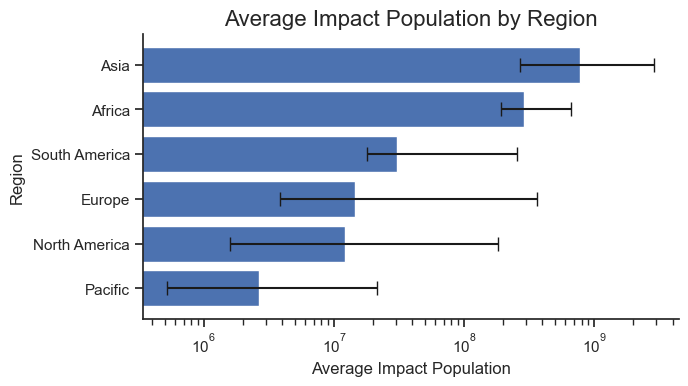

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting bar charts
# 绘制柱状图
df_region = pd.read_csv('E:/wyy/code_project/running_outcome/final_data/SPDB/part4_assess/thq/region_impact_population.csv')

sns.set_palette("deep")

plt.figure(figsize=(180/25.4, 100/25.4)) 
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

region_stats = df_region.groupby('region').agg({'avg_pop': ['mean', 'min', 'max']})
region_stats.columns = ['mean', 'min', 'max']
region_stats = region_stats.sort_values('mean', ascending=True)

region_stats['error_lower'] = region_stats['mean'] - region_stats['min']
region_stats['error_upper'] = region_stats['max'] - region_stats['mean']

bars = plt.barh(region_stats.index, region_stats['mean'], 
                xerr=[region_stats['error_lower'], region_stats['error_upper']], 
                capsize=5)

plt.title('Average Impact Population by Region', fontsize=16)
plt.ylabel('Region', fontsize=12)
plt.xlabel('Average Impact Population', fontsize=12)
plt.tight_layout()
plt.xscale('log')

plt.savefig('E:/wyy/code_project/running_outcome/final_data/SPDB/part4_assess/thq/region_impact_population_chart2.svg', dpi=300)
plt.show()
plt.close()

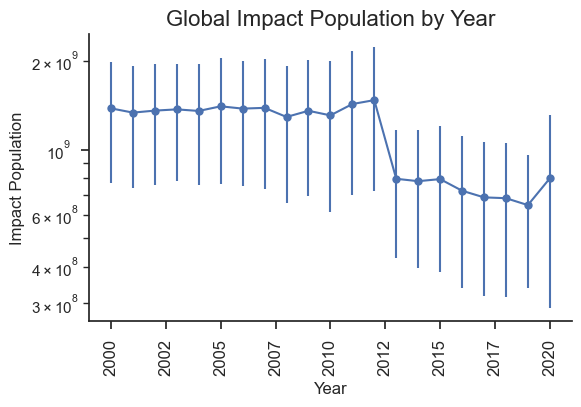

图表已生成并保存。


In [63]:
from matplotlib.ticker import FuncFormatter
# Plotting line graphs
# 绘制折线图
df_global = pd.read_csv('E:/wyy/code_project/running_outcome/final_data/SPDB/part4_assess/thq/global_impact_population.csv')
plt.figure(figsize=(6, 4))
global_stats = df_global.groupby('year').agg({'sum_pop': ['mean', 'std']})
global_stats.columns = ['mean', 'std']
ax = plt.errorbar(global_stats.index, global_stats['mean'], yerr=global_stats['std'], fmt='-o', capsize=5)

plt.title('Global Impact Population by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Impact Population', fontsize=12)
plt.ticklabel_format(style='plain', axis='y') 
plt.yscale('log')
plt.tight_layout()
plt.xticks(fontsize=12, rotation=90)

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))
plt.savefig('E:/wyy/code_project/running_outcome/final_data/SPDB/part4_assess/thq/global_impact_population_chart.svg', dpi=300)
plt.show()
plt.close()

In [64]:
import pandas as pd
import numpy as np
from scipy import stats

# 95 per cent confidence interval
# 置信区间
df_global = pd.read_csv('E:/wyy/code_project/running_outcome/final_data/SPDB/part4_assess/thq/global_impact_population.csv')

average_population = df_global['sum_pop'].mean()
median_population = df_global['sum_pop'].median()
confidence_interval = stats.norm.interval(0.95, loc=average_population, scale=stats.sem(df_global['sum_pop']))
print(f"MEAN: {average_population}")
print(f"MEDIAN: {median_population}")
print(f"95 per cent confidence interval: {confidence_interval}")

全球影响人口的平均数: 1130342132.4589353
全球影响人口的中位数: 917133514.1056048
全球影响人口的95%置信区间: (1121649013.9470186, 1139035250.970852)
